In [1]:
import numpy as np
from gradvi.priors import Ash
from gradvi.inference import  LinearRegression

n = 100
p = 200
pcausal = 20
s2 = 1.4
k = 10
sk = (np.power(2.0, np.arange(k) / k) - 1)
np.random.seed(100)

X = np.random.normal(0, 1, size = n * p).reshape(n, p)
b = np.zeros(p)
b[:pcausal] = np.random.normal(0, 1, size = pcausal)
err = np.random.normal(0, np.sqrt(s2), size = n)
y = np.dot(X, b) + err

In [8]:
k = 10
sk = (np.power(2.0, np.arange(k) / k) - 1)
prior = Ash(sk, scaled = True)
gvlin = LinearRegression(debug = False, display_progress = False, get_elbo = True)
gvlin.fit(X, y, prior)

2022-04-28 15:06:02,670 | gradvi.inference.linear_regression | INFO | Terminated at iteration 283.


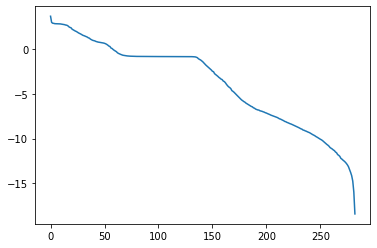

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.plot(np.arange(gvlin.niter), gvlin.obj_path)
ax1.plot(np.arange(gvlin.niter), np.log(gvlin.obj_path - np.min(gvlin.obj_path) + 1e-8))
plt.show()

In [26]:
np.all([gvlin.obj_path[i+1] < gvlin.obj_path[i] for i in range(len(gvlin.obj_path) - 1)])

True

In [22]:
gvlin.elbo_path

[289.713355087414,
 274.4898937564528,
 274.2669873054755,
 274.2039540043471,
 274.1269202219711,
 274.1144117570798,
 274.11081743832756,
 274.03774646116364,
 273.8668273724552,
 273.6976594150209,
 273.3605989742907,
 272.8892650898274,
 272.65625935693595,
 272.1437366799904,
 271.0223630623738,
 270.89279253701045,
 270.0885265553932,
 268.6799758191718,
 266.90177644362996,
 266.70000555584613,
 265.91534203698023,
 264.7684214047451,
 264.510145105754,
 264.2142416917491,
 263.2188111643948,
 263.2032523380207,
 262.8053161887,
 262.59334757384426,
 262.1614970183611,
 262.0201190740162,
 261.84511692599045,
 261.741637590967,
 261.59463251305056,
 261.46753977569824,
 261.03950184834036,
 260.9685691968001,
 260.8553076768792,
 260.422218354899,
 260.2064123728156,
 260.1032213354411,
 260.04433572659116,
 259.99762817829185,
 259.85554544675585,
 259.8068368307592,
 259.76185898308404,
 259.7423689474553,
 259.71181206330937,
 259.67376999745045,
 259.6367655014367,
 259.5920